In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data Preparation

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000



Features Description

    gender : person gender (male or female)
    age : person age
    hypertension : if the person has hypertension(1) or not(0)
    hearth_disease : if the person has hearth disease(1) or not (0)
    ever_married : if the person has ever been married (Yes) or not (No)
    work_type : work type (Govt_job/Private/Self-employed/children)
    Residence_type : residence type (Rural/Urban)
    avg_glucose_level : average glucose level in blood
    bmi : body mass index (a weight-to-height ratio, calculated by dividing one's weight in kilograms by the square of     one's height in meters and used as an indicator of obesity and underweight)
    smoking_status : (Unknown/formerly smoked/never smoked/smokes)
    stroke : Yes(1) No(0)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df_copy=df.copy()

In [9]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

# Data Visualization:

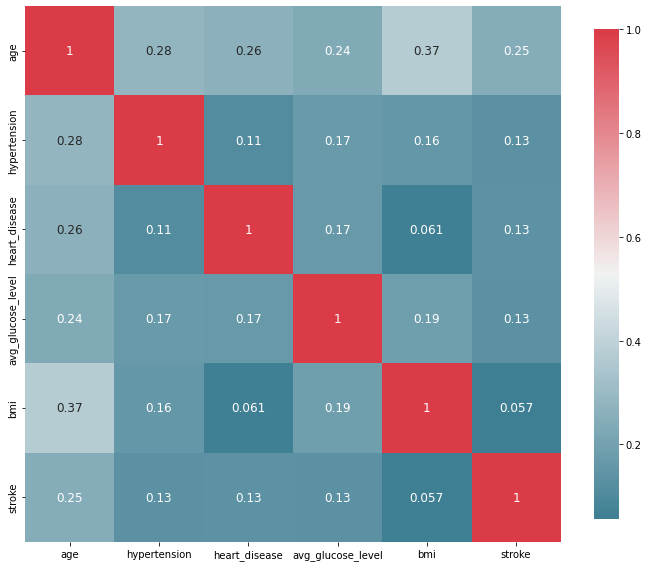

In [10]:
plot_correlation_map(df_copy)

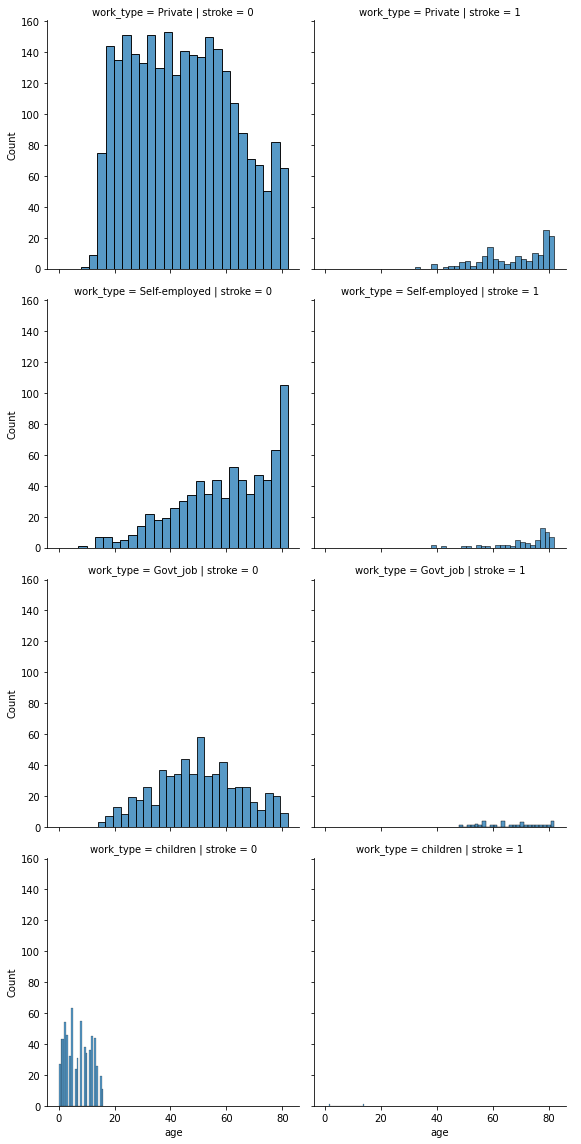

In [11]:
g1 = sns.FacetGrid(df_copy, col = "stroke", row = "work_type", height = 4)
g1.map(sns.histplot, "age", bins = 25)
g1.add_legend()
plt.show()

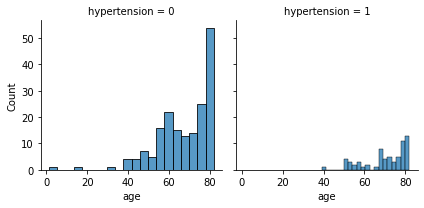

In [12]:
df_stroke1=df['stroke']==1
filtered_df_copy_stroke1 = df[df_stroke1]
filtered_df_copy_stroke1.head(20)
g_stroke1=sns.FacetGrid(filtered_df_copy_stroke1,col='hypertension')
g_stroke1.map(sns.histplot,'age',bins=20)
#gender 	age 	hypertension 	heart_disease 	ever_married 	work_type 	Residence_type 	avg_glucose_level 	bmi 	smoking_status 	stroke

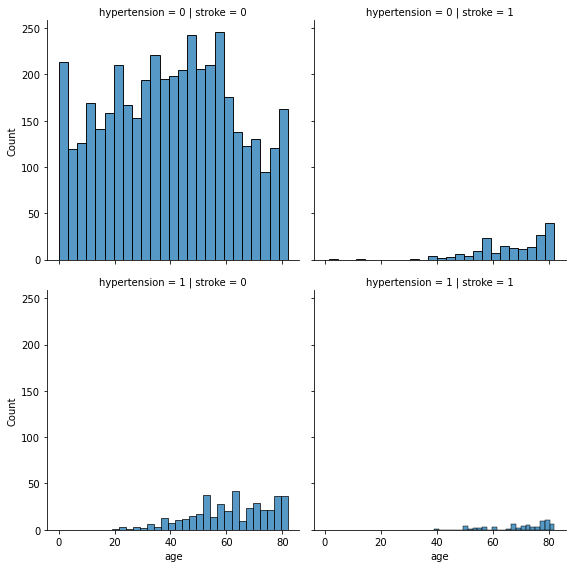

In [13]:
g2 = sns.FacetGrid(df_copy, col = "stroke", row = "hypertension", height = 4)
g2.map(sns.histplot, "age", bins = 25)
g2.add_legend()
plt.show()

Due to inbalance in data, here, I gonna focusing on those who had Brain Stroke.
we can note that the number of persons who do not have hypertension (182) is much higher than the number of persons who have hypertension (66)

In [57]:
df_copy.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

In [58]:
df_copy.groupby(['stroke','hypertension'])['hypertension'].count()

stroke  hypertension
0       0               4320
        1                413
1       0                182
        1                 66
Name: hypertension, dtype: int64

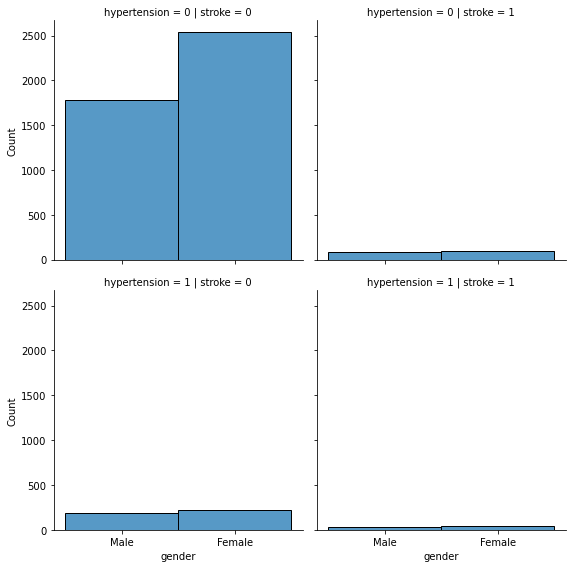

In [15]:
g3 = sns.FacetGrid(df_copy, col = "stroke", row = "hypertension", height = 4)
g3.map(sns.histplot, "gender", bins = 25)
g3.add_legend()
plt.show()

Women have the highest percentage of having hypertension and brain stroke

In [62]:
df_copy.groupby(['stroke','gender'])['gender'].count()

stroke  gender
0       Female    2767
        Male      1966
1       Female     140
        Male       108
Name: gender, dtype: int64

In [33]:
df_copy.groupby(['smoking_status','stroke'])['stroke'].count()

smoking_status   stroke
Unknown          0         1453
                 1           47
formerly smoked  0          797
                 1           70
never smoked     0         1749
                 1           89
smokes           0          734
                 1           42
Name: stroke, dtype: int64

In [59]:
df_copy.groupby(['stroke','smoking_status'])['stroke'].count()

stroke  smoking_status 
0       Unknown            1453
        formerly smoked     797
        never smoked       1749
        smokes              734
1       Unknown              47
        formerly smoked      70
        never smoked         89
        smokes               42
Name: stroke, dtype: int64

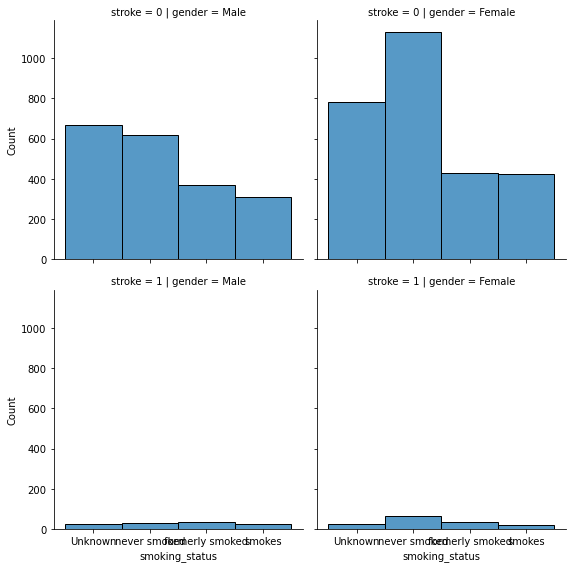

In [61]:
g3 = sns.FacetGrid(df_copy, col = "gender", row = "stroke", height = 4)
g3.map(sns.histplot, "smoking_status", bins = 25)
g3.add_legend()
plt.show()

For persons who got BS, for gender "Female" , the number of women that have never smoked is the highest 
However, for gender "Male" , the number of men that are formaly smoking is the highest 


In [69]:
df_copy[["stroke", "avg_glucose_level"]].groupby(["stroke"], as_index=True).mean()

,avg_glucose_level
stroke,
0,104.569056
1,132.175565


The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended.

The risk of having BS is higher for persons who  have a high glucose level average in blood.


C:\Users\Manel-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

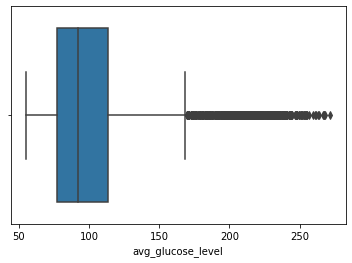

In [73]:
sns.boxplot(df_copy["avg_glucose_level"])

In [75]:
df_maskavgcl=df['avg_glucose_level']>=120
filtered_df_copy_avgcl = df[df_maskavgcl]
filtered_df_copy_avgcl.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
11,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
12,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
13,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
14,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
16,Female,71.0,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1


all persons who have a glucose level average in blood that is equal or higher than 120 had BS

In [20]:
df_copy[["stroke", "bmi"]].groupby(["stroke"], as_index=True).mean()

,bmi
stroke,
0,28.409698
1,30.186694


Adult BMI Calculator ; Below 18.5, Underweight ; 18.5—24.9, Healthy Weight ; 25.0—29.9, Overweight ; 30.0 and Above, Obesity.
We can note that the average bmi of persons who got BS is 30.18 ==> Obese people are at risk of having BS.

C:\Users\Manel-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

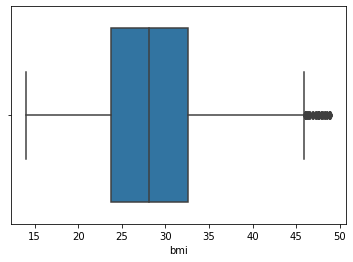

In [71]:
sns.boxplot(df_copy["bmi"])

there are outliers here for bmi, values over 45

In [72]:
df_maskbmi=df['bmi']>=45
filtered_df_copy_bmi = df[df_maskbmi]
filtered_df_copy_bmi.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
17,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
53,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
64,Male,43.0,0,0,Yes,Self-employed,Urban,143.43,45.9,Unknown,1
134,Female,78.0,1,0,No,Private,Urban,203.87,45.7,never smoked,1
143,Female,80.0,0,0,Yes,Private,Urban,64.44,45.0,never smoked,1
154,Female,65.0,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
160,Male,70.0,1,0,Yes,Private,Rural,242.52,45.5,formerly smoked,1
295,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0
319,Female,44.0,0,0,Yes,Private,Rural,107.41,47.3,never smoked,0
366,Female,33.0,0,0,Yes,Private,Rural,71.16,46.5,smokes,0


In [21]:
df_copy[["stroke", "age"]].groupby(["stroke"], as_index=True).mean()

,age
stroke,
0,42.141348
1,67.819839


From all observations, we can note that the age has impact on the probability of having Brain Stroke or not 
the older you get, the more likely you are to have BS

In [63]:
df_copy.groupby(['stroke','heart_disease'])['heart_disease'].count()

stroke  heart_disease
0       0                4505
        1                 228
1       0                 201
        1                  47
Name: heart_disease, dtype: int64

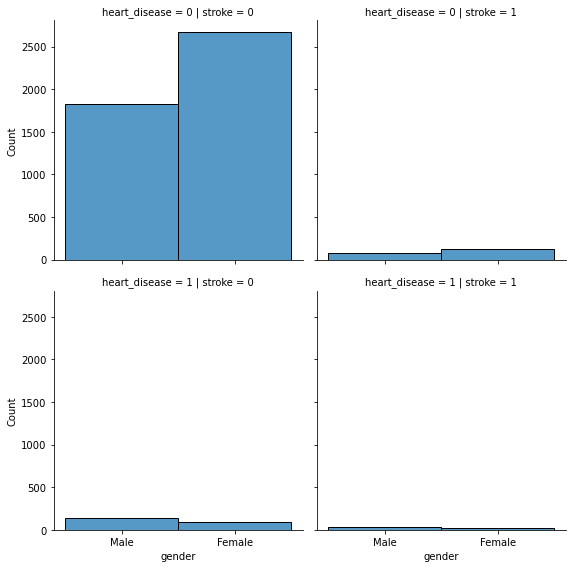

In [25]:
g3 = sns.FacetGrid(df_copy, col = "stroke", row = "heart_disease", height = 4)
g3.map(sns.histplot, "gender", bins = 25)
g3.add_legend()
plt.show()

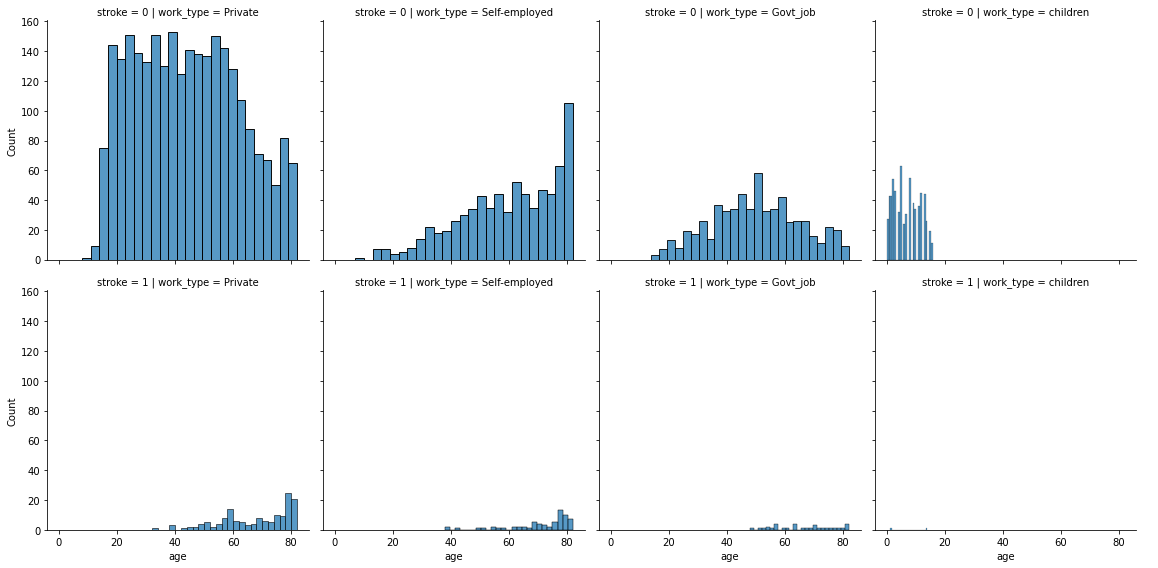

In [64]:
g2 = sns.FacetGrid(df_copy, col = "work_type", row = "stroke", height = 4)
g2.map(sns.histplot, "age", bins = 25)
g2.add_legend()
plt.show()

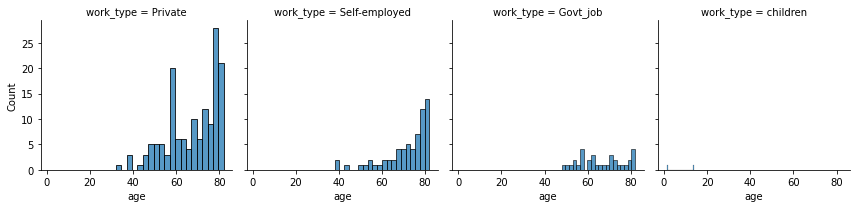

In [66]:
df_mask0=df_copy['stroke']==1
filtered_df_copy_BS1 = df_copy[df_mask0]
g_surv0=sns.FacetGrid(filtered_df_copy_BS1,col='work_type')
g_surv0.map(sns.histplot,'age',bins=20)

The risk of having BS is higher for persons who work in the private field than those who are self-employed and so on for "Govt_job"

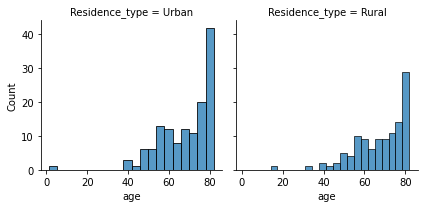

In [68]:
g_RT=sns.FacetGrid(filtered_df_copy_BS1,col='Residence_type')
g_RT.map(sns.histplot,'age',bins=20)

The risk of having BS is higher for persons who live in urban than those who live in rural

In [15]:
df_copy2=df_copy.copy()
cleanup_Sex={"gender":{"Female":1, "Male": 0}}  
df_copy2.replace(cleanup_Sex, inplace=True)
df_copy2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
uniqueWT, countsWT =np.unique(df_copy2["work_type"], return_counts=True)
print(np.asarray((uniqueWT, countsWT)).T)

[['Govt_job' 644]
 ['Private' 2860]
 ['Self-employed' 804]
 ['children' 673]]


In [17]:
cleanup_work_type={"work_type":{"Govt_job":0, "Private": 1,"Self-employed": 2,"children":3}}  
df_copy2.replace(cleanup_work_type, inplace=True)
df_copy2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,1,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,1,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,1,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,Yes,2,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,Yes,1,Urban,186.21,29.0,formerly smoked,1


In [18]:
uniqueRS, countsRS =np.unique(df_copy2["Residence_type"], return_counts=True)
print(np.asarray((uniqueRS, countsRS)).T)

[['Rural' 2449]
 ['Urban' 2532]]


In [19]:
cleanup_RS={"Residence_type":{"Rural":0, "Urban": 1}}  
df_copy2.replace(cleanup_RS, inplace=True)
df_copy2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,1,1,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,1,0,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,1,1,171.23,34.4,smokes,1
3,1,79.0,1,0,Yes,2,0,174.12,24.0,never smoked,1
4,0,81.0,0,0,Yes,1,1,186.21,29.0,formerly smoked,1


In [20]:
uniqueSS, countsSS =np.unique(df_copy2["smoking_status"], return_counts=True)
print(np.asarray((uniqueSS, countsSS)).T)

[['Unknown' 1500]
 ['formerly smoked' 867]
 ['never smoked' 1838]
 ['smokes' 776]]


In [21]:
cleanup_SS={"smoking_status":{"never smoked":0, "smokes": 1,"Unknown": 2,"formerly smoked":3}}  
df_copy2.replace(cleanup_SS, inplace=True)
df_copy2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,1,1,228.69,36.6,3,1
1,0,80.0,0,1,Yes,1,0,105.92,32.5,0,1
2,1,49.0,0,0,Yes,1,1,171.23,34.4,1,1
3,1,79.0,1,0,Yes,2,0,174.12,24.0,0,1
4,0,81.0,0,0,Yes,1,1,186.21,29.0,3,1


In [22]:
unique, counts =np.unique(df_copy2["stroke"], return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4733]
 [   1  248]]


In [23]:
cleanup_M={"ever_married":{"Yes":1, "No": 0}}  
df_copy2.replace(cleanup_M, inplace=True)
df_copy2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,1,1,228.69,36.6,3,1
1,0,80.0,0,1,1,1,0,105.92,32.5,0,1
2,1,49.0,0,0,1,1,1,171.23,34.4,1,1
3,1,79.0,1,0,1,2,0,174.12,24.0,0,1
4,0,81.0,0,0,1,1,1,186.21,29.0,3,1


# Choosing the Right Algorithm:Logistic Regression

## Implementing the model :LR

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [25]:
X_all = df_copy2[['gender', 'age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
Y = df_copy2['stroke']

x_train_all,x_test_all,y_train_all,y_test_all = train_test_split(X_all,Y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg_all = LogisticRegression()   #build our logistic model
logreg_all.fit(x_train_all, y_train_all)  #fitting training data
y_pred_all  = logreg_all.predict(x_test_all)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg_all.score(x_test_all, y_test_all)))

Accuracy=0.95


C:\Users\Manel-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

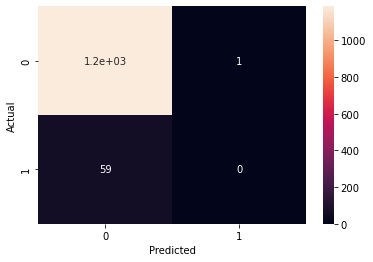

In [34]:
confusion_matrix_all_LR = pd.crosstab(y_test_all, y_pred_all, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_all_LR, annot=True)

In [50]:
unique_y_pred, counts_y_pred =np.unique(y_pred_all, return_counts=True)
print(np.asarray((unique_y_pred, counts_y_pred)).T)


[[   0 1245]
 [   1    1]]


In [51]:
unique_y_test_all, counts_y_test_all =np.unique(y_test_all, return_counts=True)
print(np.asarray((unique_y_test_all, counts_y_test_all)).T)

[[   0 1187]
 [   1   59]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_all,y_pred_all))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1187
           1       0.00      0.00      0.00        59

    accuracy                           0.95      1246
   macro avg       0.48      0.50      0.49      1246
weighted avg       0.91      0.95      0.93      1246



•	Accuracy : How many correct predictions have we made from all the observations? Accuracy = 0.95 ((TP+TN)/(TP+FP+FN+TN))
•	Recall : Out of all the persons that had Brain Stroke, how many did we get correct? Recall = 0 (Recall = TP/(TP+FN))
•	Precision.
Out of all the persons that we predicted to have Brain Stroke, how many did we actually get right? Precision=0 (TP/(TP+FP))


## Improving the model:LR

In [49]:
X = df_copy2[['age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
Y = df_copy2['stroke']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.95


In [52]:
unique_y_pred_, counts_y_pred_ =np.unique(y_pred, return_counts=True)
print(np.asarray((unique_y_pred_, counts_y_pred_)).T)


[[   0 1246]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

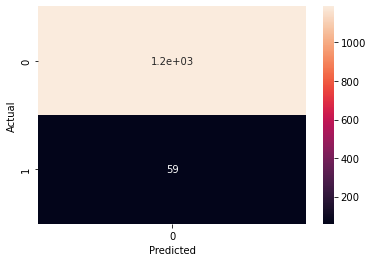

In [53]:
confusion_matrix_LR = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_LR, annot=True)

True Negative=1200
False Negative=59
==> The model predict that all persons from test set will get Brain Sroke (TP=0)
==> When we reduced the number of used features, the performance get worse.

## Comparing it with others

### Decision Trees & Random Forests

In [27]:
from sklearn import tree   
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
tree_DTC = tree.DecisionTreeClassifier()  
tree_DTC.fit(x_train_all, y_train_all)   #fitting our model
y_pred_DT_all=tree_DTC.predict(x_test_all)   # evaluating our model
print("score:{}".format(accuracy_score(y_test_all, y_pred_DT_all)))


score:0.9085072231139647


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

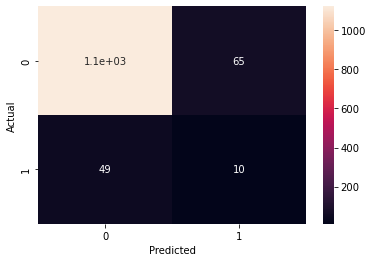

In [36]:
confusion_matrix_all_DT = pd.crosstab(y_test_all, y_pred_DT_all, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_all_DT, annot=True)

True negative=10
Despite the fact that the DT model accuracy islower than that of the LR one, its true negative is higher

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test_all,y_pred_DT_all))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1187
           1       0.13      0.17      0.15        59

    accuracy                           0.91      1246
   macro avg       0.55      0.56      0.55      1246
weighted avg       0.92      0.91      0.91      1246



Recal and precision values increase.

In [54]:
#plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
#tree.plot_tree(tree_DTC,filled=True)  
#plt.savefig('tree.svg',format='svg',bbox_inches = "tight")

In [47]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
tree_DTC_KF = tree.DecisionTreeClassifier()  

Cross_val = cross_val_score(tree_DTC_KF,X_all,Y, cv = 10)
print("Accuracy on each fold/subset :",Cross_val)
print("The acerage accuracy is ",sum(Cross_val)/10)
    

Accuracy on each fold/subset : [0.90781563 0.91365462 0.91967871 0.89156627 0.91164659 0.88554217
 0.89759036 0.93172691 0.91365462 0.89759036]
The acerage accuracy is  0.9070466233672164


In [33]:
tree_DTC_par = tree.DecisionTreeClassifier(criterion="gini", splitter='random',max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
tree_DTC_par.fit(x_train_all, y_train_all)   #fitting our model
y_pred_DT_par=tree_DTC_par.predict(x_test_all)   # evaluating our model
print("score:{}".format(accuracy_score(y_test_all, y_pred_DT_par)))

score:0.9526484751203852


Comparing to the previous model, in which all the parameters are set as default (criterion="gini", splitter='best',max_leaf_nodes=None,min_samples_leaf=1, max_depth=None), we have changed the splitter, max_leaf_nodes, min_samples_leaf and the max_depth parameters. Accordingly, the accuracy get improved a little bit

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

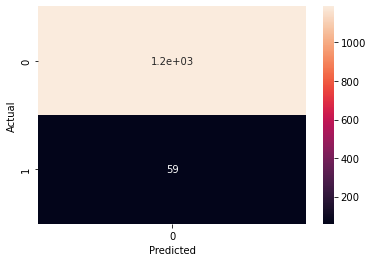

In [37]:
confusion_matrix_all_DT_par = pd.crosstab(y_test_all, y_pred_DT_par, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_all_DT_par, annot=True)

In [31]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
clf_10=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf_10.fit(x_train_all, y_train_all)  #Training our model
y_pred_RF_10=clf_10.predict(x_test_all)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test_all, y_pred_RF_10))  #Measuring the accuracy of our model

Accuracy: 0.9486356340288925


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

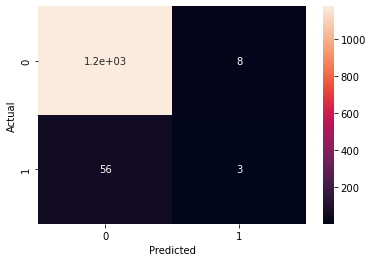

In [38]:
confusion_matrix_all_RF_10 = pd.crosstab(y_test_all, y_pred_RF_10, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_all_RF_10, annot=True)

In [32]:
clf_100=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf_100.fit(x_train_all, y_train_all)  #Training our model
y_pred_RF_100=clf_100.predict(x_test_all)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test_all, y_pred_RF_100))  #Measuring the accuracy of our model

Accuracy: 0.9518459069020867


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

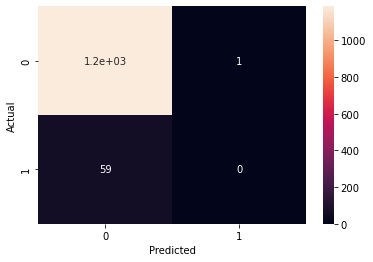

In [39]:
confusion_matrix_all_RF_100 = pd.crosstab(y_test_all, y_pred_RF_100, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_all_RF_100, annot=True)

### K-Nearest Neighbours(KNN):


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_10=KNeighborsClassifier(n_neighbors=10) #build our knn classifier
knn_10.fit(x_train_all,y_train_all) #Training KNN classifier
y_pred_knn_10=knn_10.predict(x_test_all)  #Testing
print('Acuuracy=',accuracy_score(y_pred_knn_10,y_test_all))


Acuuracy= 0.9510433386837881


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

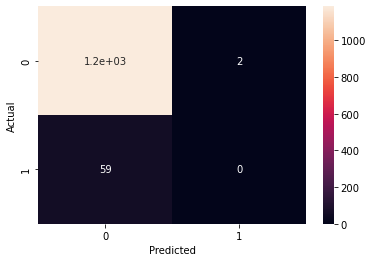

In [56]:
confusion_matrix_all_knn = pd.crosstab(y_test_all, y_pred_knn_10, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_all_knn, annot=True)

In [43]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train_all,y_train_all)
    y_pred_knn=knn.predict(x_test_all)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred_knn,y_test_all),2))
    scores.append(round(accuracy_score(y_pred_knn,y_test_all),2))


Accuracy for k= 1 is: 0.95
Accuracy for k= 2 is: 0.95
Accuracy for k= 3 is: 0.95
Accuracy for k= 4 is: 0.95
Accuracy for k= 5 is: 0.95
Accuracy for k= 6 is: 0.95
Accuracy for k= 7 is: 0.95
Accuracy for k= 8 is: 0.95
Accuracy for k= 9 is: 0.95
Accuracy for k= 10 is: 0.95
Accuracy for k= 11 is: 0.95
Accuracy for k= 12 is: 0.95
Accuracy for k= 13 is: 0.95
Accuracy for k= 14 is: 0.95
Accuracy for k= 15 is: 0.95
Accuracy for k= 16 is: 0.95
Accuracy for k= 17 is: 0.95
Accuracy for k= 18 is: 0.95
Accuracy for k= 19 is: 0.95
Accuracy for k= 20 is: 0.95
Accuracy for k= 21 is: 0.95
Accuracy for k= 22 is: 0.95
Accuracy for k= 23 is: 0.95
Accuracy for k= 24 is: 0.95
Accuracy for k= 25 is: 0.94
Accuracy for k= 26 is: 0.95
Accuracy for k= 27 is: 0.94
Accuracy for k= 28 is: 0.95
Accuracy for k= 29 is: 0.91
